<h1> Objective:- Assessment Task 7.1P:  </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 221047083 </b></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo

In [2]:
speech = AudioSegment.from_wav('arctic_a0005.wav') # Read audio data from file
x = speech.get_array_of_samples() # samples x(t)
x_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x_sr)
print('Number of samples: ', len(x))

Sampling rate:  16000
Number of samples:  22640


In [3]:
duration = librosa.get_duration(filename = 'arctic_a0005.wav')
n_samples = duration * x_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  1.415
n_samples:  22640.0


Text(0, 0.5, 'Amplitude')

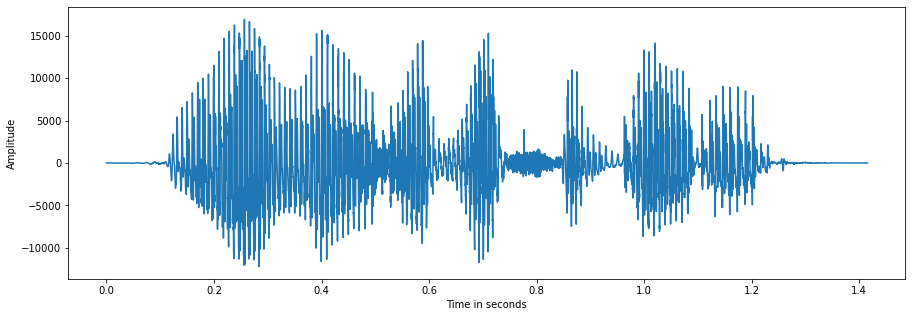

In [4]:
x_range = np.linspace(0, duration, len(x))
plt.figure(figsize = (15, 5))
plt.plot(x_range, x)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

In [5]:
mid_point = int(len(x) / 2)
x1 = x[0:mid_point]
x2 = x[mid_point:len(x)]
x1_audio = AudioSegment(
 #raw data
 data = x1,

 #2 bytes = 16 bit samples
 sample_width = 2,

 #frame rate
 frame_rate = x_sr,

 #channels = 1 for mono and 2 for stereo
 channels = 1)
x2_audio = AudioSegment(
 #raw data
 data = x2,

 #2 bytes = 16 bit samples
 sample_width = 2,

 #frame rate
 frame_rate = x_sr,

 #channels = 1 for mono and 2 for stereo
 channels = 1)
x1_audio.export('arctic_a0005_1.wav', format = 'wav')
x2_audio.export('arctic_a0005_2.wav', format = 'wav')

<_io.BufferedRandom name='arctic_a0005_2.wav'>

### Task 1 - Visualise x1 and x2 in time domain

In [6]:
speech = AudioSegment.from_wav('arctic_a0005_1.wav') # Read audio data from file
x1 = speech.get_array_of_samples() # samples x1(t)
x1_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x1_sr)
print('Number of samples: ', len(x1))

Sampling rate:  16000
Number of samples:  11320


In [7]:
duration = librosa.get_duration(filename = 'arctic_a0005_1.wav')
n_samples = duration * x1_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  0.7075
n_samples:  11320.0


Text(0, 0.5, 'Amplitude')

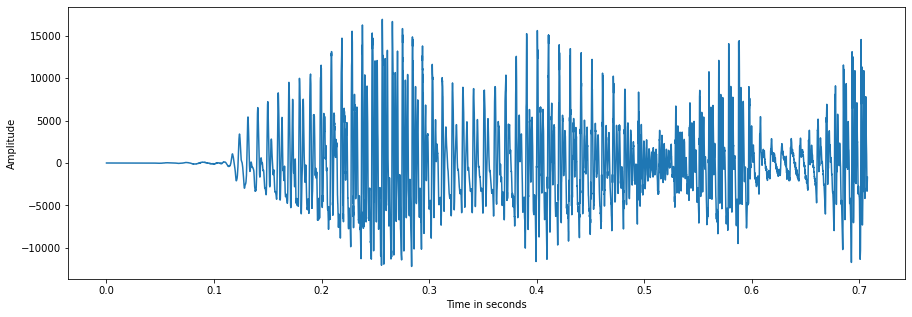

In [8]:
#Visualise x1
x1_range = np.linspace(0, duration, len(x1))
plt.figure(figsize = (15, 5))
plt.plot(x1_range, x1)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

In [9]:
speech = AudioSegment.from_wav('arctic_a0005_2.wav') # Read audio data from file
x2 = speech.get_array_of_samples() # samples x2(t)
x2_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x2_sr)
print('Number of samples: ', len(x2))

Sampling rate:  16000
Number of samples:  11320


In [10]:
duration = librosa.get_duration(filename = 'arctic_a0005_2.wav')
n_samples = duration * x2_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  0.7075
n_samples:  11320.0


Text(0, 0.5, 'Amplitude')

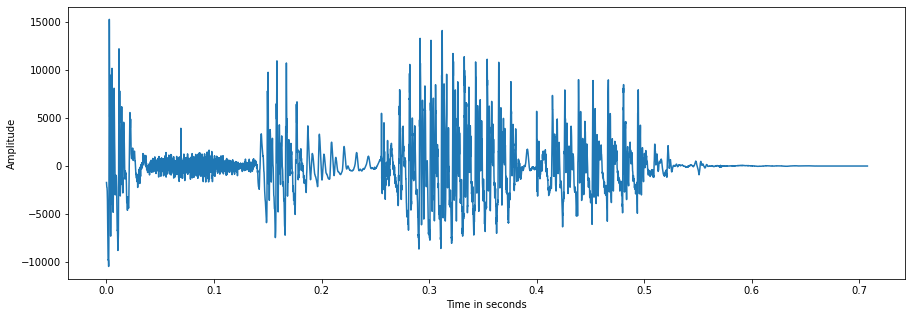

In [11]:
#Visualise x2
x2_range = np.linspace(0, duration, len(x2))
plt.figure(figsize = (15, 5))
plt.plot(x2_range, x2)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

## 2. Fourier Transform

In [12]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x_sr * 0.03)
#number of samples between tww consecutive frames
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X = librosa.stft(np.float32(x),
n_fft = freq_range,
window = window,
hop_length = hop_length,
win_length = win_length)

In [13]:
print(X.shape)

(513, 95)


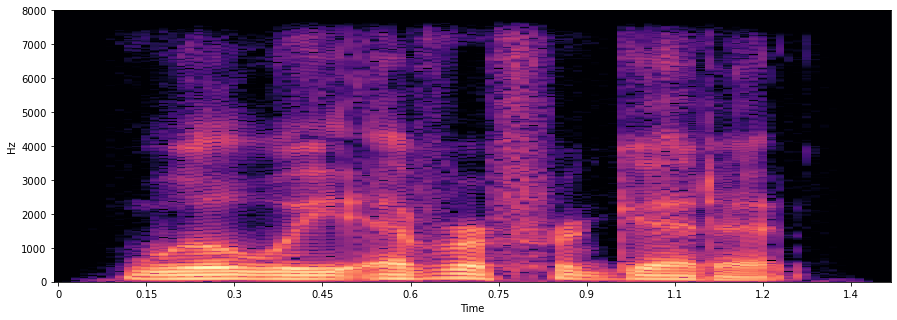

In [14]:
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(
 #spectrogram
 Xdb,

 #sampling rate
 sr = x_sr,

 #label for horizontal axis
 x_axis = 'time',

 #presentation scale
 y_axis = 'linear',

 #hop_lenght
 hop_length = hop_length)

## Spectogram for x1

In [15]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x1_sr * 0.03)
#number of samples between tww consecutive frames
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X1 = librosa.stft(np.float32(x1),
n_fft = freq_range,
window = window,
hop_length = hop_length,
win_length = win_length)

In [16]:
print(X1.shape)

(513, 48)


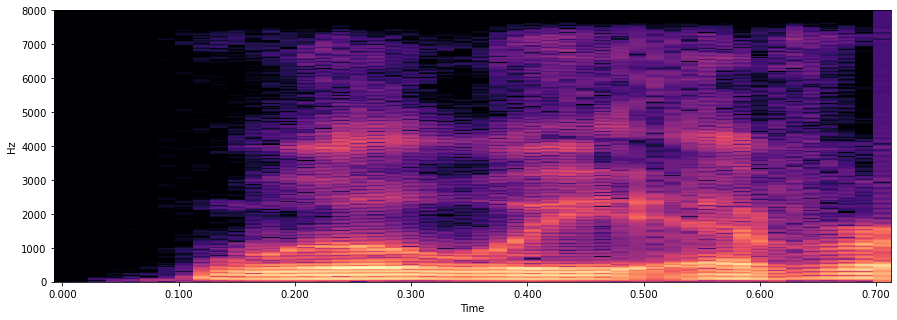

In [17]:
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X1))
librosa.display.specshow(
 #spectrogram
 Xdb,

 #sampling rate
 sr = x1_sr,

 #label for horizontal axis
 x_axis = 'time',

 #presentation scale
 y_axis = 'linear',

 #hop_lenght
 hop_length = hop_length)

## Spectogram for x2

In [18]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x2_sr * 0.03)
#number of samples between tww consecutive frames
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X2 = librosa.stft(np.float32(x2),
n_fft = freq_range,
window = window,
hop_length = hop_length,
win_length = win_length)

In [19]:
print(X2.shape)

(513, 48)


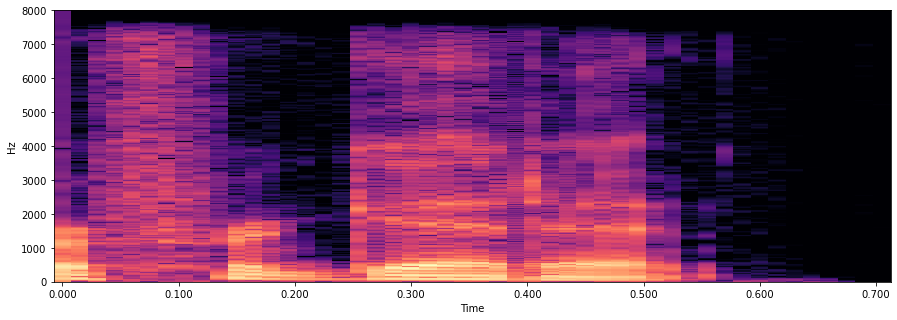

In [20]:
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X2))
librosa.display.specshow(
 #spectrogram
 Xdb,

 #sampling rate
 sr = x2_sr,

 #label for horizontal axis
 x_axis = 'time',

 #presentation scale
 y_axis = 'linear',

 #hop_lenght
 hop_length = hop_length)

In [21]:
#number of samples
N = 600
#sample spacing
T = 1.0 / 800.0
t = np.linspace(0.0, N*T, N)
s1 = np.sin(50.0 * 2.0 * np.pi * t)
s2 = 0.5 * np.sin(80.0 * 2.0 * np.pi * t)
s = s1 + s2

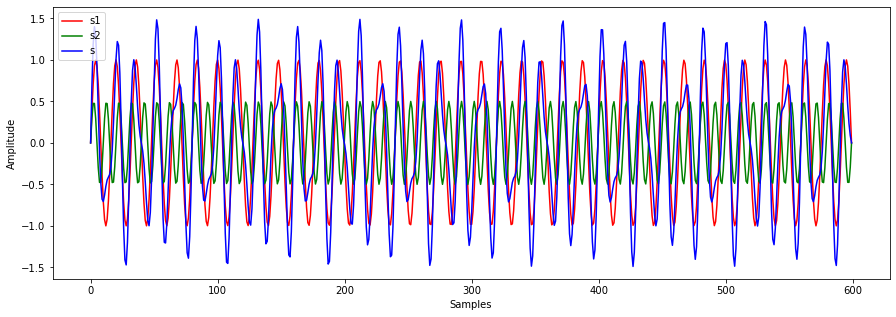

In [22]:
plt.figure(figsize = (15, 5))
plt.plot(s1, label = 's1', color = 'r')
plt.plot(s2, label = 's2', color = 'g')
plt.plot(s, label = 's', color = 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(loc = "upper left")

#### i) Fourier transform with window = "hann"

/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


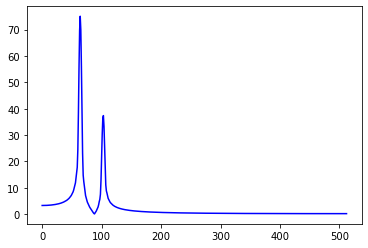

In [23]:
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


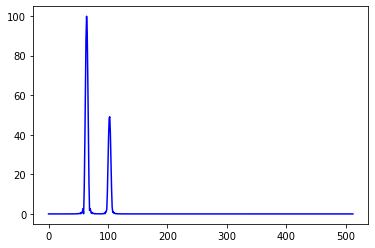

In [24]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

#### ii) Fourier transform with window = "boxcar"

/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


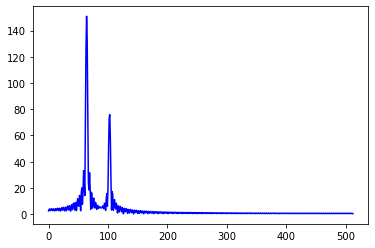

In [25]:
S = librosa.stft(s, n_fft = 1024, window = 'boxcar', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


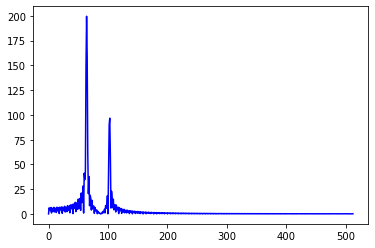

In [26]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'boxcar', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

#### iii) Fourier transform with window = "hamming"

/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


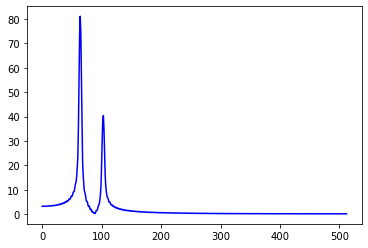

In [27]:
S = librosa.stft(s, n_fft = 1024, window = 'hamming', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


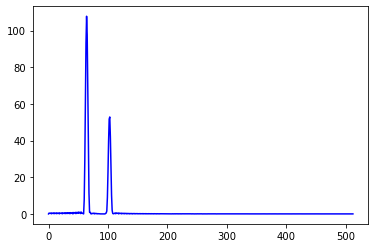

In [28]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hamming', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')